get velocity time averaged before horizontal average

In [9]:
#import neccesary library
import sys
import h5py
import numpy as np
import tecplot_io as tec
import os
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.ticker as tck

In [10]:
path = 'd:\post\Project\Fixed_Turbine'
os.chdir(path)
print("current working directory is: {0}".format(os.getcwd()))

current working directory is: d:\post\Project\Fixed_Turbine


In [11]:
#parameters
#kappa = 0.4
#nu = 1.511e-5
#PEX = 1.45444104333
#PEY = 8.72664625997
#hbar = 0.46
#uinfty = 2.54390548295
dt = 0.68543297937
#Rotational angular period
T_turb = 42.84
U_star = 0.356
H_hub = 70
#Mean finite velocity
U = 11.5258407161
tis = 200
tie = 15000
tii = 200
nti = int((tie - tis) / tii + 1)

In [12]:
for it in range(nti):
    ti = tis + tii * it
    time = ti * dt
    fname = 'DAT_{:010d}.h5'.format(ti)
#    print("Reading file "+ fname)
    f = h5py.File(fname, "r")

    #print("Keys: %s" % f.keys())
    ## Old version Keys: [u'dz', u'dzw', u'eta', u'eta0', u'hh', u'pp', u'u', u'v', u'w', u'z', u'zw', u'zz']
    ## New version Keys: [u'eta', u'hh', u'pp', u'u', u'v', u'w', u'z']
    
    zz = np.array(f["z"][:,0,0]).copy()
    u = f["u"]
    v = f["v"]
    w2 = f["w"]
    w = np.array(w2).copy()

#   print(u.shape)

    NPX = u.shape[2]
    NPY = u.shape[1]
    NPZ = u.shape[0]
    
    if it==0:
      u_all = np.zeros((NPZ,NPY,NPX))
      v_all = np.zeros((NPZ,NPY,NPX))
      w_all = np.zeros((NPZ,NPY,NPX))

    w[0, :, :] = w2[0, :, :]
    for k in range(1,NPZ):
      w[k, :, :] = 0.5*(w2[k-1, :, :] + w2[k, :, :])
      
    u_all = u_all + u
    v_all = v_all + v
    w_all = w_all + w

In [13]:
#time average
u_all = u_all / nti
v_all = v_all / nti
w_all = w_all / nti

In [14]:
#horizontal average
u_hozirontal = np.zeros((NPZ))
for i in range (NPZ):
    u_hozirontal[i] = np.average(u_all[i,:,:])


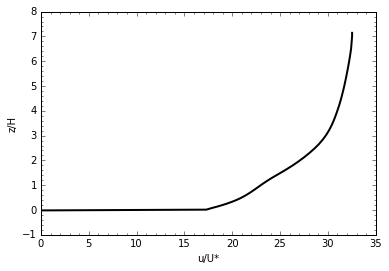

In [15]:
plt.style.use('classic')
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(u_hozirontal*U/U_star, zz/H_hub, '-', color='black', linewidth=2)
plt.xlabel('u/U*')
plt.ylabel('z/H')
#plt.yscale('log')
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.show()